In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils


2025-03-11 11:55:27.660715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train[0].shape)

(28, 28)


In [5]:
# Reshape data to fit CNN input (28x28x1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [6]:
# Normalize the data (scale pixel values between 0 and 1)
X_train /= 255
X_test /= 255

In [7]:
# One-hot encode the labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# Define the CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# Build the model
model = cnn_model()


In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
938/938 - 15s - loss: 0.2391 - accuracy: 0.9269 - val_loss: 0.0499 - val_accuracy: 0.9834 - 15s/epoch - 16ms/step
Epoch 2/10
938/938 - 14s - loss: 0.0822 - accuracy: 0.9759 - val_loss: 0.0372 - val_accuracy: 0.9868 - 14s/epoch - 15ms/step
Epoch 3/10
938/938 - 16s - loss: 0.0620 - accuracy: 0.9815 - val_loss: 0.0373 - val_accuracy: 0.9889 - 16s/epoch - 17ms/step
Epoch 4/10
938/938 - 16s - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0361 - val_accuracy: 0.9888 - 16s/epoch - 17ms/step
Epoch 5/10
938/938 - 17s - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9894 - 17s/epoch - 18ms/step
Epoch 6/10
938/938 - 17s - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0291 - val_accuracy: 0.9901 - 17s/epoch - 18ms/step
Epoch 7/10
938/938 - 18s - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0255 - val_accuracy: 0.9914 - 18s/epoch - 19ms/step
Epoch 8/10
938/938 - 17s - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0278 - val_accuracy: 0.9905 - 17s/epoch - 19ms/step


In [11]:

# Save the trained model
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5


In [12]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

Test Accuracy: 98.95%


In [13]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

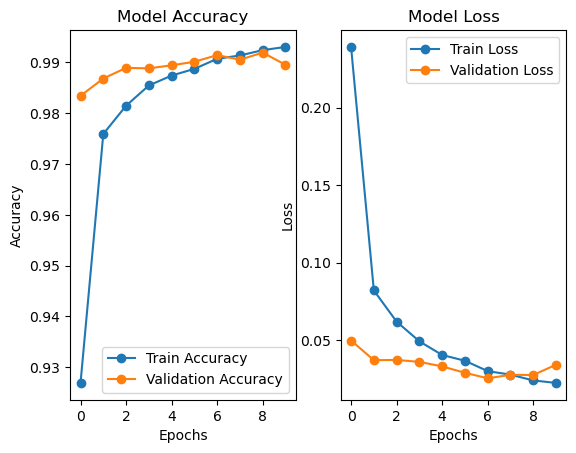

In [14]:
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
total_test_size=X_test.shape
print(total_test_size[0])
display_data=50
rows=int(display_data/10)
print(f"rows={rows} | total_test_size={total_test_size}")

10000
rows=50 | total_test_size=(10000, 28, 28, 1)


1/1 [==============================] - 0s 17ms/step


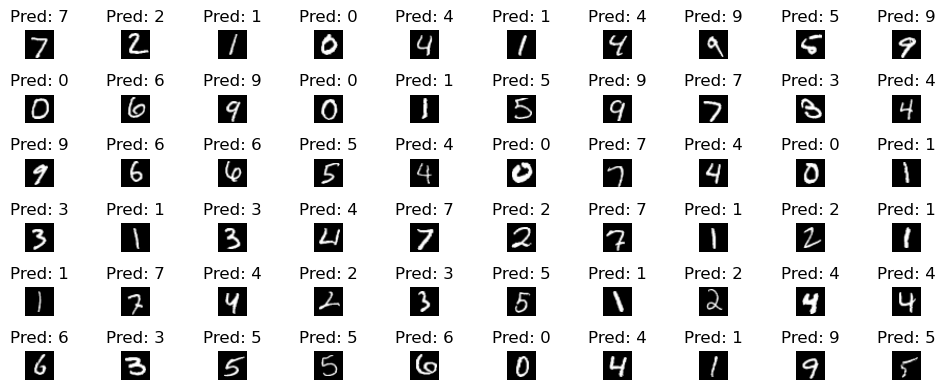

In [26]:
# Visualize Sample Test Predictions
plt.figure(figsize=(10, 4))
for i in range(60):
    plt.subplot(6, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    prediction = np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1)))
    plt.title(f"Pred: {prediction}")
    plt.axis('off')


plt.tight_layout()  # Prevent overlapping
plt.show()

In [ ]:
# from tensorflow.keras.utils import plot_model

In [ ]:
# Save model architecture as an image
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [2]:
# # Display in Jupyter Notebook (if using Jupyter)
# from IPython.display import Image
# Image('model_architecture.png')